### 문제정의
   - 보스턴 주택 가격 데이터를 사용하여 주택 가격을 예측해보자
   - 회귀모델
   - LinearRegression, SGDRegressor

### 데이터 수집

In [53]:
from sklearn import datasets
X, y = datasets.fetch_openml('boston', return_X_y=True)

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [54]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [55]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


In [57]:
X['CHAS'] = X['CHAS'].astype('int64')
X['RAD'] = X['RAD'].astype('int64')

### 문제와정답합치기
- concat

In [58]:
import pandas as pd
total = pd.concat([X,y], axis = 1)
total

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


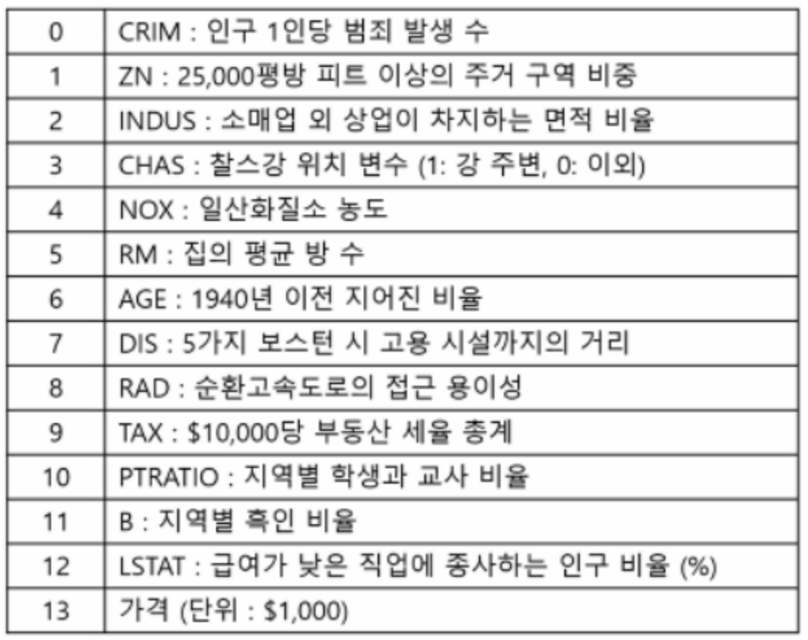

### 데이터 전처리
   - 결측치, 이상치 확인단계
   - 데이터 전처리 생략

#### 특성확장
- 특성들끼리 곱해서 새로운 특성을 만들자


In [59]:
col = X.columns # X가 가지고 있는 컬럼들
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [60]:
col.size

13

In [61]:
for i in range(col.size) : # 전체 컬럼을 순서대로 꺼내오는 for문
    for j in range(i, col.size) : # 어떤 컬럼을 곱할지 정하는 for
        # CRIM*CRIM
        X[col[i]+'*'+col[j]] = X[col[i]] * X[col[j]]
        # 컬럼명으로 추가하여 X에 반영

In [62]:
X.shape   # 크기확인 13 --> 104로 확장

(506, 104)

In [63]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX*TAX,TAX*PTRATIO,TAX*B,TAX*LSTAT,PTRATIO*PTRATIO,PTRATIO*B,PTRATIO*LSTAT,B*B,B*LSTAT,LSTAT*LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


#### 데이터 스케일링
 - 주의사항: 데이터 전처리 마지막에 사용(결측치가 없는 상태에서 사용, 이상치는 있어도 됨)

In [85]:
from sklearn.preprocessing import StandardScaler 

In [86]:
standard = StandardScaler()

In [87]:
X.head()  # 문제(X)가 가지고 있는 범위 확인

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX*TAX,TAX*PTRATIO,TAX*B,TAX*LSTAT,PTRATIO*PTRATIO,PTRATIO*B,PTRATIO*LSTAT,B*B,B*LSTAT,LSTAT*LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


In [88]:
standard.fit(X)

StandardScaler()

In [91]:
# 문제(X)의 기준으로 변환
X_trans = standard.transform(X)
X_trans   # 변환된 스케일링을 적용하여 훈련과 평가데이터 다시 분리하기

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.52632759,
        -0.88025024, -0.78952949],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.52632759,
        -0.24786578, -0.54045362],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.4494135 ,
        -1.03094709, -0.82582493],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.52632759,
        -0.77992002, -0.7598079 ],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.46107896,
        -0.66078951, -0.71663755],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.52632759,
        -0.43940531, -0.63138918]])

### 탐색적 데이터 분석

#### 상관관계 분석
   - 피어슨 상관계수 : 두 컬럼의 선형도 판단

In [64]:
total.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


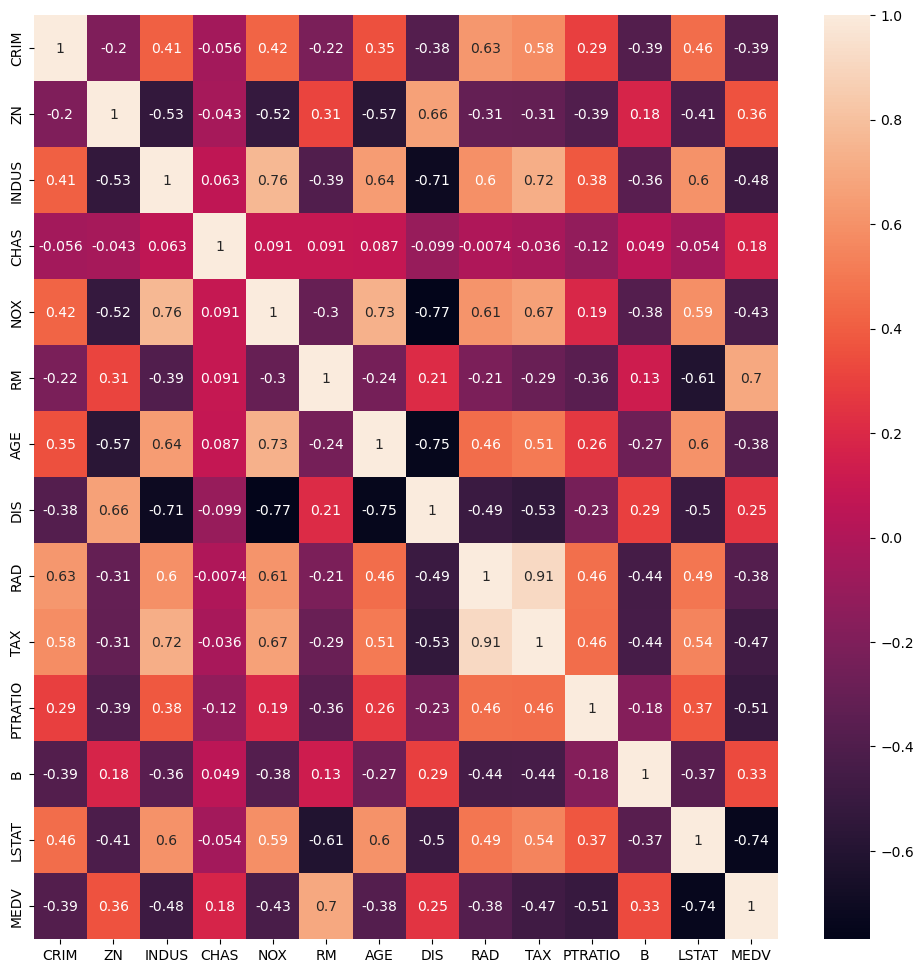

In [65]:
# 관계를 시각적으로 확인하기
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(total.select_dtypes(include=['int64', 'float64']).corr(), annot = True)
plt.show()

# heatmap() : 시각적으로 뚜렷한 차이를 확인 --> 데이터를 전처리할 때 우선순위를 판단하는 근거
# 모델을 학습하는데 시간이 많이 걸린다
# - 데이터를 줄여야 함 (서비스를 제공할 때도 시간을 줄이자는 의미)
# - 가지고 있는 문제(특성)들 중에서 상관도가 낮은 것부터 삭제를 하고
# - 추가적으로 전처리를 해야하는데 시간이 부족할 때는 상관도가 높은 것부터 차례로 전처리

### 모델 선택 및 하이퍼파라미터 튜닝


In [66]:
# 수학적 공식을 이용한 해석적 모델
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# 경사하강법
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor(eta0=0.00001) # 학습율 0.01 (발산) ==> 0.00001 (정상적인 값)

### 훈련과 평가로 분리
- 학습 7 : 평가 3

In [92]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

# 스케일링 적용(X_trans)
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size = 0.3, random_state=10)

### 학습

In [93]:
linear_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=1e-05)

### 예측

In [94]:
linear_model.score(X_train, y_train)

0.9327287349548266

In [95]:
linear_model.score(X_test, y_test)

0.8737472733583983

In [96]:
sgd_model.score(X_train, y_train)

-3.6715214832276146

In [97]:
sgd_model.score(X_test, y_test)

-3.3226262815752348

- 선형모델(회귀) 평가 지표
    - 여러 머신러닝 모델들을 사용했을 때 성능지표를 보고 모델을 비교하고 판단
    - 정량적인 지표가 중요
    - MSE : 0 ~ 무한대, 
         - ex) 오차 300 --> 오차를 판단하는 기준 모호
    - MSE를 기준으로 R2 score를 사용 => score
    - R2 score : 분산을 기반으로 예측 성능을 평가 (-1 ~ 1)
        - -1 : 모델이 설명을 잘 못함
        - 1 : 모델이 잘 설명함, 모델이 좋다고 판단

### 규제를 적용시킨 모델
- LinearRegression 모델이 가지고 있는 단점
    - 모델이 잘못되었을 경우 수정이 안 된다. => 규제를 가해서 단점을 해소
    - LinearRegression + L1규제 ==> Lasso
    - LinearRegression + L2규제 ==> Ridge
- 규제? 선형모델에서 가중치(w)에 영향을 주는 것 => 모델에 개입을 한다.

In [73]:
from sklearn.linear_model import Lasso, Ridge

### Ridge 활용하기

In [74]:
# 하이퍼파라미터(alpha) 튜닝

def ridge_alpha(alpha) :
    # ridge 모델 생성
    ridge = Ridge(alpha=alpha)   # alpha기본값 : 1.0, -무한대 ~ 무한대
                                 # 일반적으로 사용하는 값의 범위 : 0.001 ~ 1000
    # 학습
    ridge.fit(X_train, y_train)
    # 결과 확인 - 훈련용 데이터, 검증용 데이터
    print('train_score : ', ridge.score(X_train, y_train))
    print('test_score : ', ridge.score(X_test, y_test))

In [75]:
ridge_alpha(0.001)
# alpha 값을 증가 ==> 규제를 늘리겠다 : 모델이 복잡해지는 것을 막겠다.(과대적합일 때 사용)
# alpha 값을 감소 ==> 규제를 줄이겠다 : 모델이 단순해지는 것을 막겠다.(과소적합일 때 사용)

train_score :  0.9385736725239302
test_score :  0.7542527035017017


C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.36203e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


- Ridge 모델 (LinearRegression + L2규제) 정리
    - 규제를 줄이니까(alpha값 감소) test_score 상승
    - 과대적합보다는 과소적합 or 일반화에 가까운 상황
    - 모든 w에 특정 %만큼 (변수)규제를 가함 --> 0에 가깝게는 되지만 0은 되지 않음
    - 규제를 많이 가하더라도 전체 가중치를 사용
    - 전체 데이터가 고루 중요할 때 사용

### Lasso 활용하기

In [80]:
import numpy as np

def lasso_alpha(alpha) :
    # ridge 모델 생성
    lasso = Lasso(alpha=alpha)   # alpha기본값 : 1.0, -무한대 ~ 무한대
                                 # 일반적으로 사용하는 값의 범위 : 0.001 ~ 1000
    # 학습
    lasso.fit(X_train, y_train)
    # 결과 확인 - 훈련용 데이터, 검증용 데이터
    print('train_score : ', lasso.score(X_train, y_train))
    print('test_score : ', lasso.score(X_test, y_test))
    
    # 사용한 특성의 수 확인
    print('사용한 특성의 수 :' , np.sum(lasso.doef_ !=0))

In [82]:
# np.sum((asso.coef_ != 0)

# np.(값) => 값을 전부 다 더해주겠다
# lasso_coef ==> lasso 학습 후 전체 데이터 특성들의 가중치 값을 출력
# 사용되지 않는 값 (가중치) = 0 --> False
# 사용된 값(가중치) !=0 --> True

# lasso.coef_ != 0
# np.sum([True, False, True, False]) ==> True의 개수를 세어서 사용한 특성의 수로 반환

In [83]:
lasso_alpha(0.01)

# train_score :  0.8809787531170591
# test_score :  0.8111737801906844

# 현재 전체 특성의 수 : 104

# 규제항(alpha)을 변경할 때마다 사용되는 특성의 수 확인

train_score :  0.9202714599391311
test_score :  0.769464292092239


C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e+03, tolerance: 2.943e+00
  model = cd_fast.enet_coordinate_descent(


- Lasso모델 (LinearRegression + L1규제) 정리
    - 규제(증가)를 적용할수록 test score값이 낮아짐
    - 규제를 적용할수록 사용하는 특성의 수도 감소
    - 모든 w에 특정값만큼의 규제를 가함(상수)
    - 가중치가 0이 되어 사용하지 않는 특성이 생김 ==> 특성 선택에 활용
    - 가중치가 -가 되면 0으로 처리
    - 특정 데이터가 중요할 때 사용